# COGS 108 - Airplane Fatality Analysis
[[Introduction Video]](https://youtu.be/wINDs2INphA)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In this project, we are going to investigate what are some relevant factors related to the air crash fatalaties.

# Names

- Zihan Chen
- Ning Ma
- Kancheng Yin
- Nan Jiang

<a id='research_question'></a>
# Research Question

**General question**: What makes an airplane crash more fatal? 


**Specific question**: 
1. Does the fatality (rate) associate with a specific time of the day and specific location of the world? 
2. Does the fatality (rate) associate with who's operataing the plane *(private vs. military personale)*?
3. Is there any keywords are more likely to associate with high fatality accident *(e.g., "birds", "air traffic", "operator errors")*?


<a id='background'></a>

## Background & Prior Work

> ***Preface***:<br> 
> Our group was motivated by a recent fatal accident in our home country China, in which the crash of the China Eastern plane on Monday, March 21st, killed all 132 people aboard. Therefore, while grieving the loss of those lives, we want to take the COGS 108 project as an opportunity to explore the history of world aircraft crashes and mourn all losses involved in those accidents…

Such tragedies are rarely reported worldwide nowadays, as the development of technology and the industry seems to improve the safety of air travel and indeed studies shows that the number of airplane crashes and fatalities decreased over the last century [^Miyamoto]. Certainly, the increase in technology and architecture of planes may reduce the risk of airplane crashes. 

Airplane crashes result from multiple factors that affect the aircraft and the reasons for airplane crashes vary from case to case, and even the reason for some still remains as mysteries. Commonly reported factors linked to airplane crashes include abnormal airplane conditions, pilot errors, and unfavorable natural conditions for flights such as air turbulence or extreme weather conditions.[^Oster]

Compared to larger airplanes, smaller commuter planes tend to have a higher fatality rate, and off-airport location is one of the most critical factors for the fatality of pilots. [^Guohua] We believe that time and location factors matter for the severity of the crashes. 




---

**Reference:**


1. [[^Miyamoto]](https://dl.acm.org/doi/abs/10.1145/3418688.3418689) Taiyo Miyamoto, Neil Whitehead, Emanuel Santos. “Investigating Airplane Crash Data with Watson Analytics and Cognos Analytics” 
2. [[^Oster]](https://ageconsearch.umn.edu/record/207282/) Oster, Clinton V.; Strong, John S.; Zorn, Kurt, “Why Airplanes Crash: Causes of Accidents Worldwide” 
3. [[^Guohua]](https://www.jstor.org/stable/45015596
) Guohua Li and Susan P. Baker, “Crashes of Commuter Aircraft and Air Taxis: What Determines Pilot Survival?”  



# Hypothesis


1. We hypothesize that the fatality rate of airplane crash is associated with the `time of the day`, `location`, `operator type`, in which flights in certain conditions are more likely to result in more severe accidents.
2. There are some shared charateristics among those most fatal airplane accidents, such as *pilot error, air traffic controller error, design and manufacturer defects, maintenance failures, sabotage, or inclement weather.*
 

# Dataset(s)

- **Dataset Name:** Airplane Crashes and Fatalities From 1908 to 2009
- **Link to the dataset:** https://data.world/data-society/airplane-crashes
- **Number of observations:** 5268 x 13
- **Data description**: The raw data frames include 5269 oberservations and 13 variables and the following are some potential variable we might use:
  - `Date`
  - `Time`
  - `Location`
  - `Operator`: military, private
  - `Type`: type of airliner
  - `Aboard`: number of passenger aboard
  - `Fatalities`: total number of death
  - `Summary`: summary of the cause of the crash


<br>

- **Dataset Name:** Supplementary Aviation Accidents in Countries Since 1919
- **Link to the dataset:** https://www.kaggle.com/datasets/ramjasmaurya/aviation-accidents-history1919-april-2022
- **Number of observations:** 21699 x 8 
- **Description of the dataset:** This dataset contains the list of airplane crashes and fatalities happened since 1919, and it also includes all information regrarding certain flight[`Country`, `date`, `Air-craft type`, `registration name/mark`, `operator`, `fatilites`, `location`, `category`])


We will mainly use first dataset since we have more information about certain airplane crash which we can analyze with. The problem with the first dataset is that it is not up-to-date, so we will use second dataset to supplement data from 2009 to 2022.

# Setup

Load libraries

In [1]:
## library
# Import numpy to handle numerical information and analyse data
import numpy as np

# Import pandas to read csv file and to work with dataframes
import pandas as pd

# Import matplotlib and seaborn to visulize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')

# Import math to perform mathematical operations
import math

# Import patsy and statsmodels to perform regression
import patsy
import statsmodels.api as sm

# New version of Statmodels & patsy
import statsmodels.formula.api as smf

# Import scipy to perform statistical operations
import scipy.stats as stats

# Set warnings to ignore
import warnings
warnings.filterwarnings('ignore')

import folium
from folium import plugins


#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

Load the data.

In [2]:
## Load data 
# Load the airplane crashes and fatalities data from 1908 to 2009
# We get this dataset from data.world(https://data.world/data-society/airplane-crashes)
df_main = pd.read_csv('data/Airplane_Crashes_and_Fatalities_From_1908_to_2009.csv')

# Load the supplimentary aviation accidents data from 1919 to 2022 which 
# we will only use data from 2009 to 2022
# We get this dataset from Kaggle(https://www.kaggle.com/datasets/ramjasmaurya/aviation-accidents-history1919-april-2022)
df_supplementary = pd.read_csv('data/supplementary_aviation_accidents.csv')

In [3]:
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7) #default plot size to output

sns.set_theme(context='notebook',
              style='white',
              font_scale=2,
              rc={'axes.spines.right': False,'axes.spines.top': False} )

# Data Cleaning

### 1 Clean the airplane crash data


As mentioned before, 

**df_main** has columns `['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type','Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary']` 
       
**df_supplementary** has columns `['Country', 'date', 'Air-craft type', 'registration name/mark', 'operator', 'fatilites', 'location', 'category']`

With our research problem, we only need `['Date', 'Location', 'Operator', 'Route', 'Type', 'Aboard', 'Fatalities', 'Summary']` columns. We will extract columns `['Country', 'date', 'Air-craft type', 'operator', 'fatilites', 'location']` from supplementary data and convert them so that two datasets have same format in same type of data. 

In [4]:
# This function is used to unify the date format to be year/month/day
def unify(data):
    data = str(data).split('/')
    if len(data) < 3:
        return ''
    return data[2] + '/' + data[0] + '/' + data[1]

# Remain the data that required by our research problem
columns_final = ['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard', 'Fatalities', 'Summary']
df_main = df_main[columns_final]

# unify the date format
df_main['Date'] = df_main['Date'].apply(unify)

Then we will transform supplementary data to the format that main dataset requires.

In [5]:
import calendar
# Notice that month in this dataset is in string format, we need to convert it to number
month_to_number = {month: str(index) for index, month in enumerate(calendar.month_abbr) if month}
for month in month_to_number:
    if len(month_to_number[month]) == 1:
        month_to_number[month] = "0" + month_to_number[month]

# This function is used to unify the date format to be year/month/day for this dataset
def filter_date(data):
    if isinstance(data, float):
        return ''
    
    data = str(data).split('-')
    if len(data) < 3:
        return ''
    if data[1] in month_to_number:
        data[1] = month_to_number[data[1]]
    
    if data[1] == '???': 
        return '/'.join([data[2], '01/01'])
    elif data[0] == '??': 
        return '/'.join([data[2], data[1], '01'])
    elif len(data) == 3:
        return '/'.join([data[2], data[1], data[0]])
    else:
        return ''

# Notice that there are weird input for fatalities(e.g. 8+1)
# So this function is used to filter the fatalities data
def filter_fatalities(data):
    data = str(data)
    if "+" in data:
        return sum([int(x) for x in data.split('+')])
    else:
        return int(data) if data.isdigit() else 0

# This function is clean the data to the format that we need in order to append to main dataframe
def transform(df_supplementary):
    df_filtered = df_supplementary[['date', 'Country', 'location', 'operator', 'Air-craft type', 'fatilites']]

    # unify the name for the columns
    df_filtered = df_filtered.rename(columns={'date': 'Date', 'location': 'Location', 'operator': 'Operator', 
                                                'Air-craft type': 'Type', 'fatilites': 'Fatalities'})

    # append the country name to the location
    df_filtered['Location'] = df_filtered['Location'] + ", " + df_filtered['Country']

    # Replace "near" in the location because we will draw heatmap with this data
    df_filtered['Location'] = df_filtered['Location'].apply(lambda x: str(x).replace('near', ''))

    # filter the date with designed functions
    df_filtered['Date'] = df_filtered['Date'].apply(filter_date)
    df_filtered['Fatalities'] = df_filtered['Fatalities'].apply(filter_fatalities)
    
    return df_filtered.drop(columns=['Country'])

df_supplementary = transform(df_supplementary)


Since We just need data from 2009 to 2022, we will append only them to the main dataframe

In [6]:
# We will only use data from 2009 to 2022
df_supplementary = df_supplementary[pd.to_datetime(df_supplementary['Date']) > "01-Jan-2009"]

# Since there are three columns this dataframe does not have, so we need to add them
df_supplementary[['Route', 'Summary']] = " "
df_supplementary['Aboard'] = -1
df_supplementary['Time'] = np.nan

# Reorder the columns
df_supplementary = df_supplementary[['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard', 'Fatalities', 'Summary']]

### 2 Merge two datasets

Now we do the last cleaning which is removing airplane crash that does not have date andreplacing invalid value to default value

In [7]:
df = df_main.append(df_supplementary).reset_index(drop=True)

# free memory
del df_main
del df_supplementary

# We replace the empty data to NaN and drop rows with NaN date
for column in columns_final:
    df[column] = df[column].replace('', np.nan)
df.dropna(subset=['Date'])
df[['Aboard', 'Fatalities']] = df[['Aboard', 'Fatalities']].fillna(0)
# Change these two columns to int
df['Aboard'] = df['Aboard'].astype(int)
df['Fatalities'] = df['Fatalities'].astype(int)

# We save this dataframe to csv file for future use
df.to_csv('data/df.csv')

### 3 The Final DataFrame
- **Date:** The year/month/day of airplane crash
- **Location:** Location of the airplane crash
- **Operator:** The institute/company/government/office that operate the flight
- **Route:** The Route of the flight
- **Type:** Airplane type of the flight
- **Aboard:** Aboard number of the flight
- **Fatalities:** Fatalities of the airplane crash
- **Summary:** Brief summary for what causes this airplane crash

In [8]:
df.head()
# df.shape

Date   Time                            Location  \
0  1908/09/17  17:18                 Fort Myer, Virginia   
1  1912/07/12  06:30             AtlantiCity, New Jersey   
2  1913/08/06    NaN  Victoria, British Columbia, Canada   
3  1913/09/09  18:30                  Over the North Sea   
4  1913/10/17  10:30          Near Johannisthal, Germany   

                 Operator          Route                    Type  Aboard  \
0    Military - U.S. Army  Demonstration        Wright Flyer III       2   
1    Military - U.S. Navy    Test flight               Dirigible       5   
2                 Private            NaN        Curtiss seaplane       1   
3  Military - German Navy            NaN  Zeppelin L-1 (airship)      20   
4  Military - German Navy            NaN  Zeppelin L-2 (airship)      30   

   Fatalities                                            Summary  
0           1  During a demonstration flight, a U.S. Army fly...  
1           5  First U.S. dirigible Akron exploded just offsh...  
2           1  The first fatal airplane accident in Canada oc...  
3          14  The airship flew into a thunderstorm and encou...  
4          30  Hydrogen gas which was being vented was sucked...

# Data Analysis & Results

### *Outline*
1. *Descriptive Analysis*
2. *Inferential Analysis*
3. *Text Analysis*
4. *Machine Learning*
5. *Geospatial Heat map*

## 1 Descriptive Analysis

### 1.1 Variable `Date`

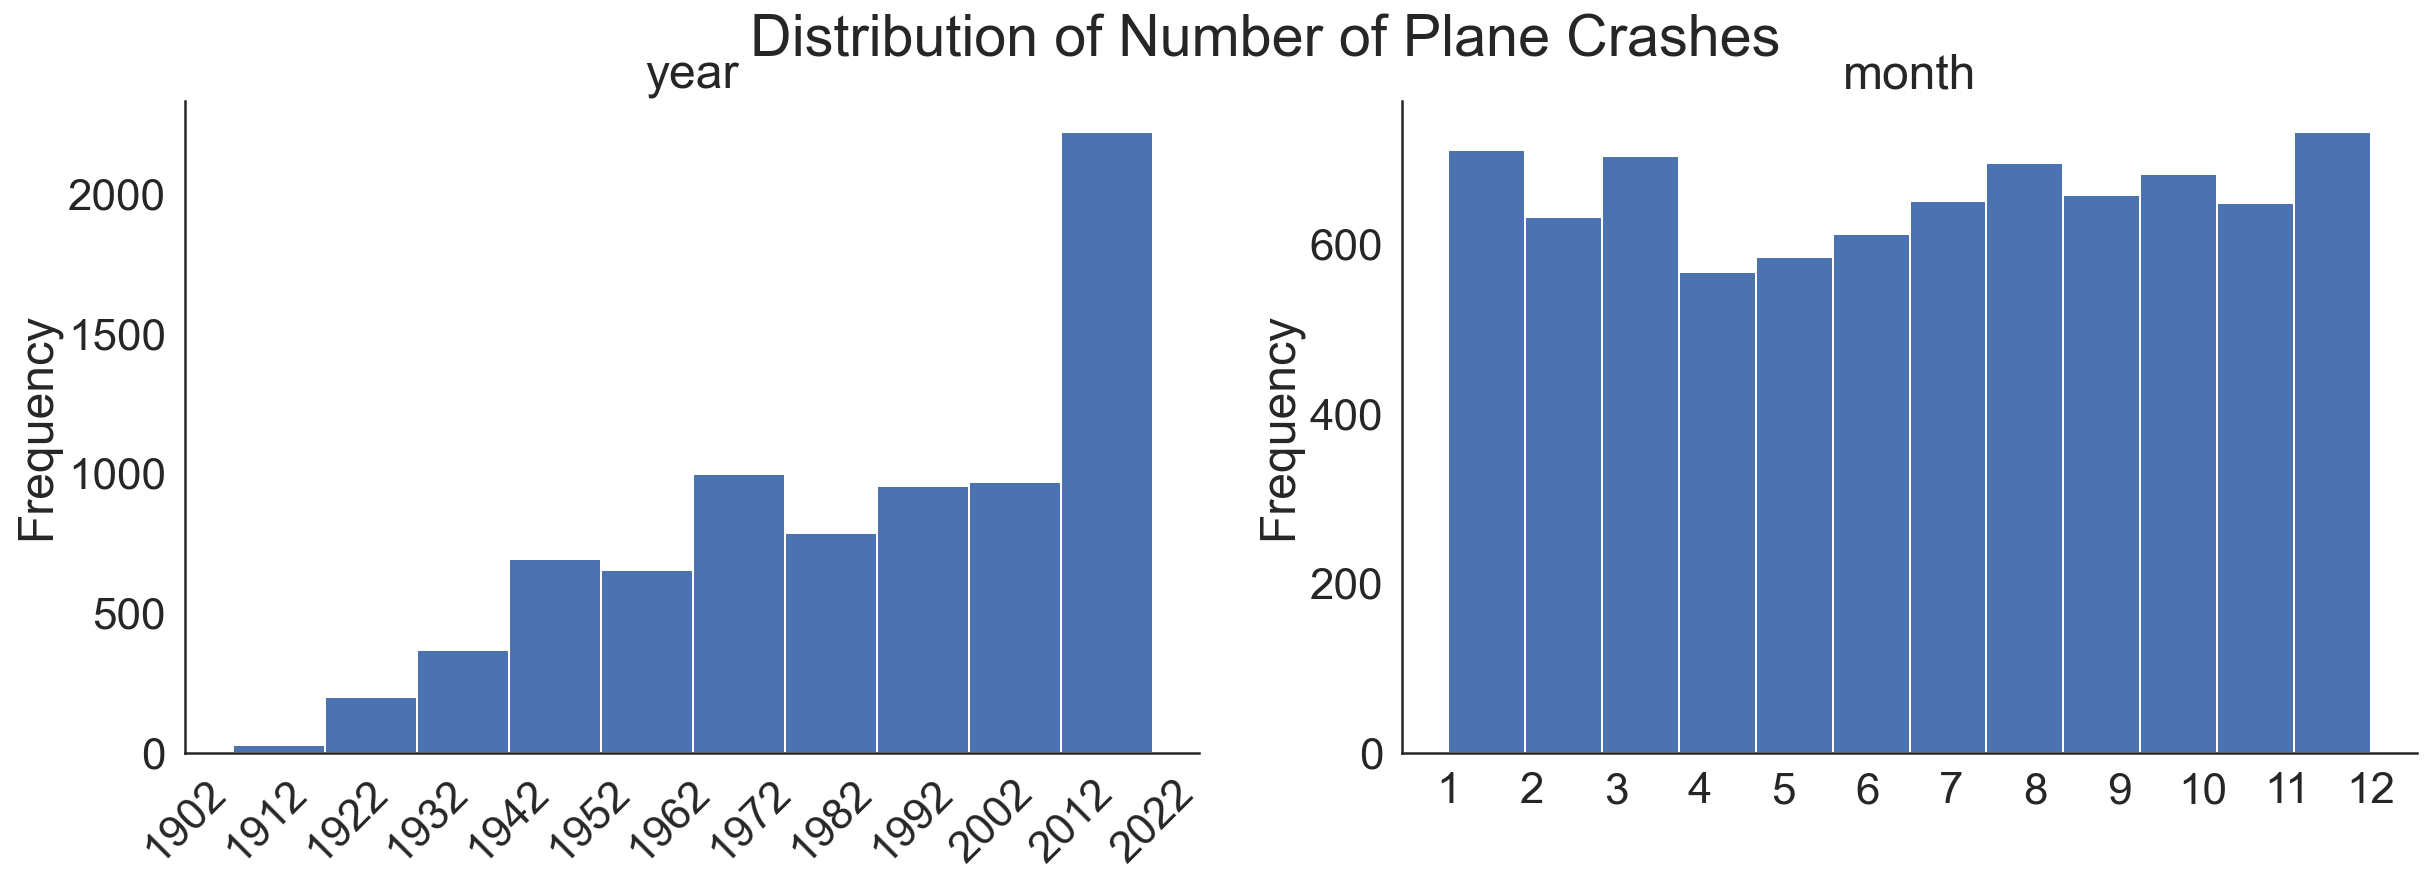

In [9]:
# Convert 'Date' datatype into datetime object
crash_date = pd.to_datetime(df['Date'])
fig, axes = plt.subplots(1, 2, figsize = (20,6))

# Plot the the number of plane crashes in each decade from 1902-2022
crash_year = crash_date.dt.year
crash_year.plot(kind = 'hist', ax = axes[0], rot = 45, title = 'year')
axes[0].set_xticks([1902 + 10 * x for x in range(13)]) 

# Plot the relation between the number of plane crashes in each month
crash_month = crash_date.dt.month
crash_month.plot(kind = 'hist', ax = axes[1], title = 'month', bins = 12)
axes[1].set_xticks([x for x in range(1,13)]) 

fig.suptitle('Distribution of Number of Plane Crashes')
plt.show()

> - When we look at the distribution of plane crashes over the **years** (decades), we see that the histogram is left-skewed, where there is an **increasing** trend of the total number of plane crashes over the years. 
> - For the number plane crashes in each **month**, we see that the distribution is nearly uniform.

### 1.2 Variable `Time`

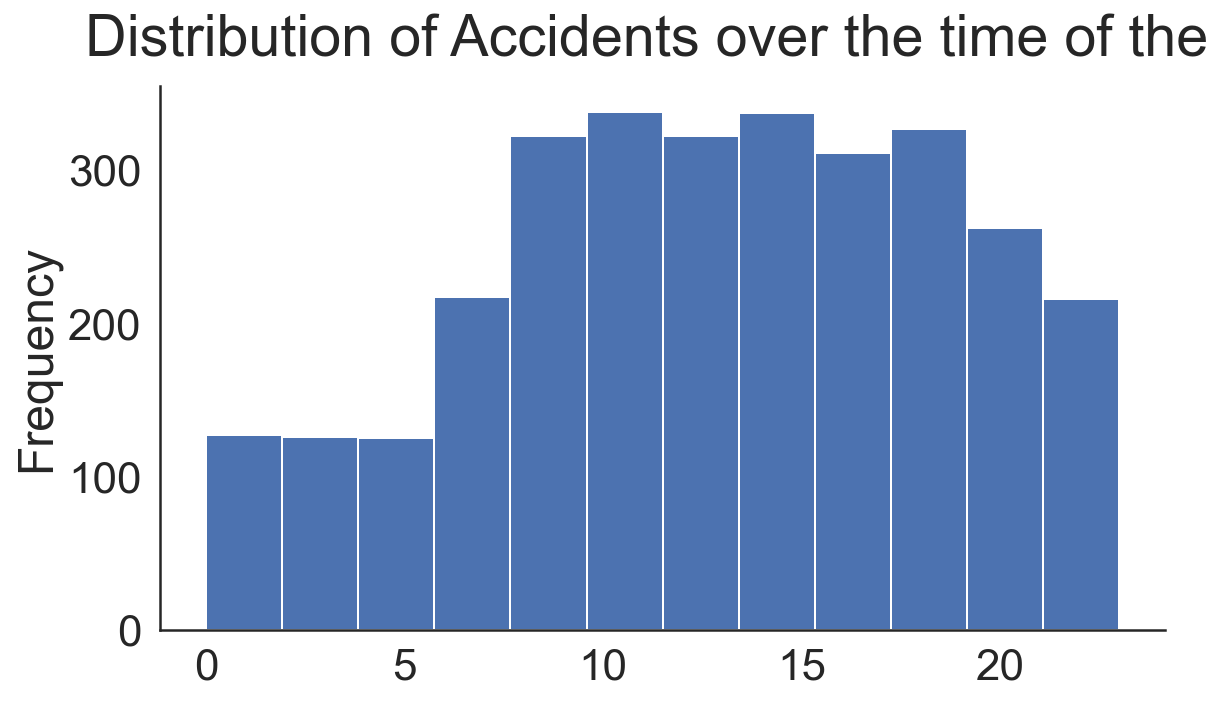

In [10]:
def clean_time(str_in):
    str_in = str(str_in)
    if(len(str_in) != 5 or str_in[2] != ':'):
        return 'na'
    else:
        return str_in[0:2]

#clean the time columnn to remove incorrect and missing data, append to new column named 'Hour'
df['Hour'] = df['Time'].apply(clean_time)

df2 = df[df['Hour'] != 'na']
df2['Hour'] = df2['Hour'].astype(int)

#plot
df2['Hour'].plot(kind = 'hist', bins = 12, figsize = (9,5))
plt.suptitle('Distribution of Accidents over the time of the')
plt.show()

The data for time is skewed to the right, where plane crashes seems to happend more after 6 am

### 1.3 Variable `Location`

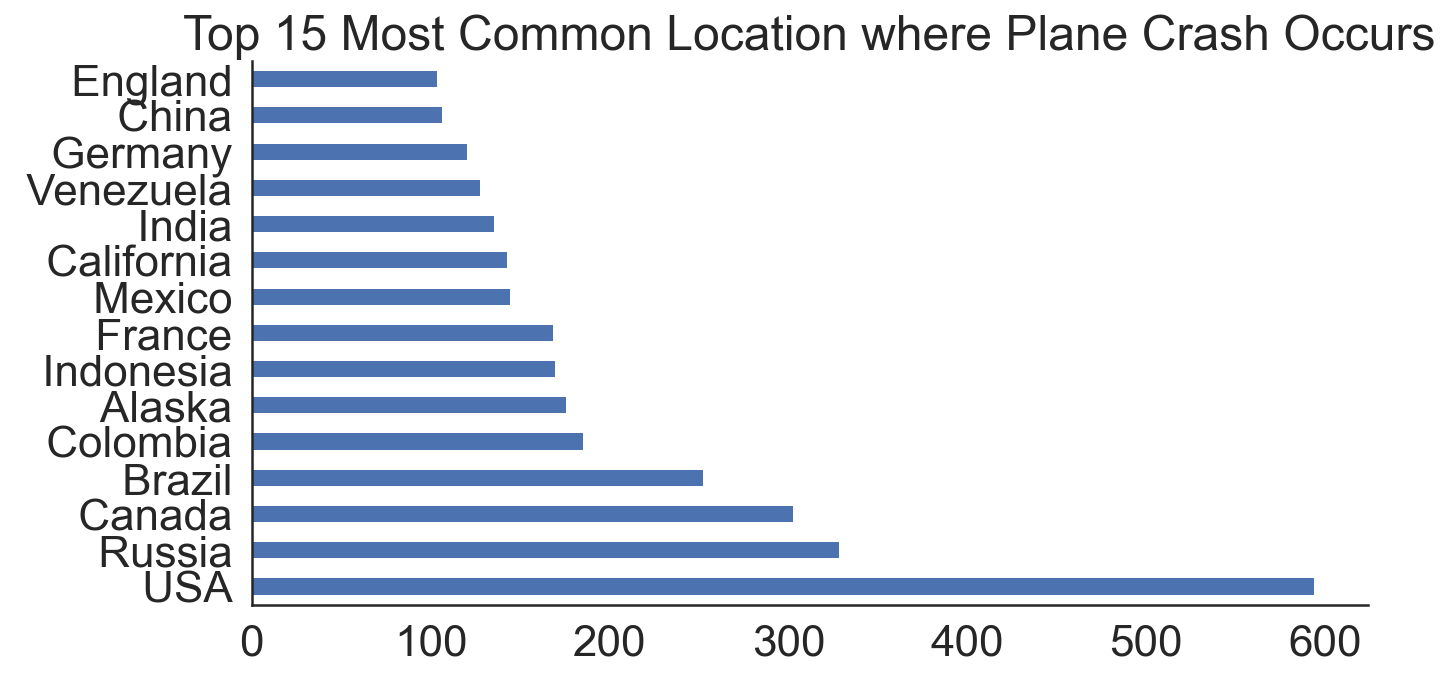

In [11]:
# Extract relavant data for plotting
loc = df['Location'].dropna()
all_loc = loc[loc.str.contains(',')].str.split(',').sum()
all_loc = pd.Series(all_loc)

#Graph
all_loc.value_counts()[:15].plot(kind = 'barh', 
                                  figsize = (10, 5), 
                                  title = 'Top 15 Most Common Location where Plane Crash Occurs')
plt.show()

### 1.4 Variable `Operator`

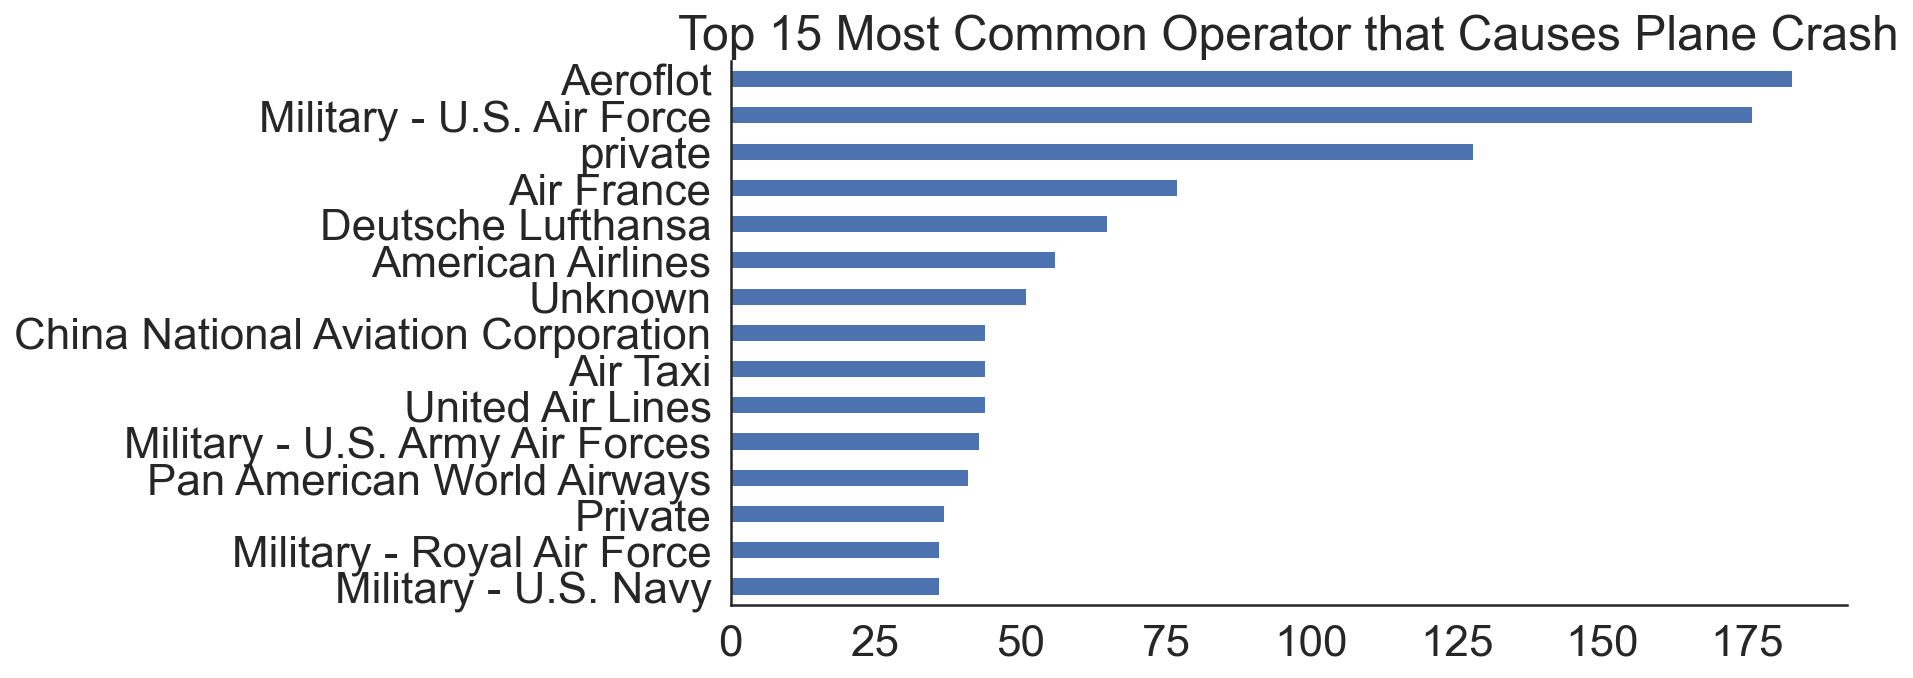

In [12]:
df['Operator'].value_counts(ascending = True)[-15:].plot(kind = 'barh', 
                                                         figsize = (10, 5), 
                                                         title = 'Top 15 Most Common Operator that Causes Plane Crash')
plt.show()

### 1.5 Variable `Aboard`

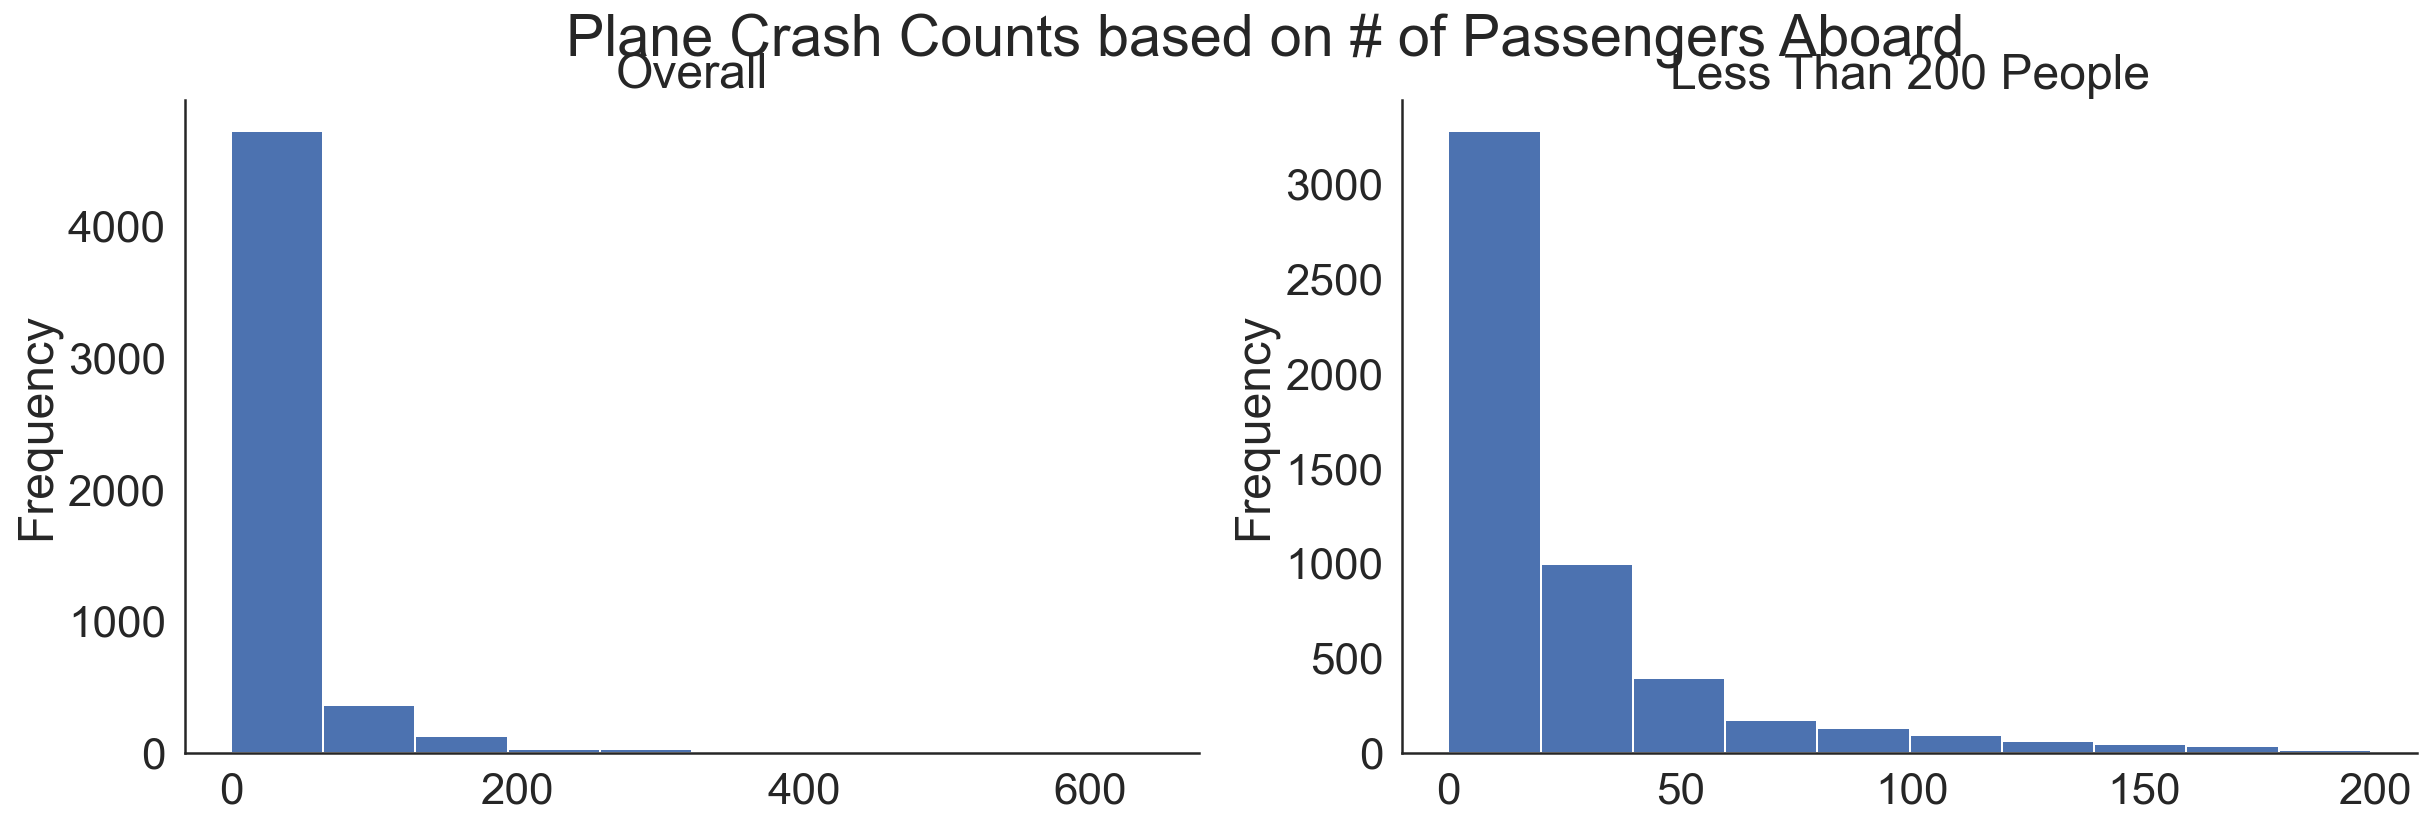

In [13]:
valid_aboard = df[df['Aboard'] >= 0]['Aboard']

fig, axes = plt.subplots(1, 2, figsize = (20,6))
valid_aboard.plot(kind = 'hist', ax = axes[0], title = 'Overall')
valid_aboard[valid_aboard < 200].plot(kind = 'hist', ax = axes[1], title = 'Less Than 200 People')
fig.suptitle('Plane Crash Counts based on # of Passengers Aboard')
plt.show()

> The overall distribution is extremely right skewed, with the majority plane crashes happens in planes that have less than 75 people on board.

### 1.6 Variable `Fatalities`

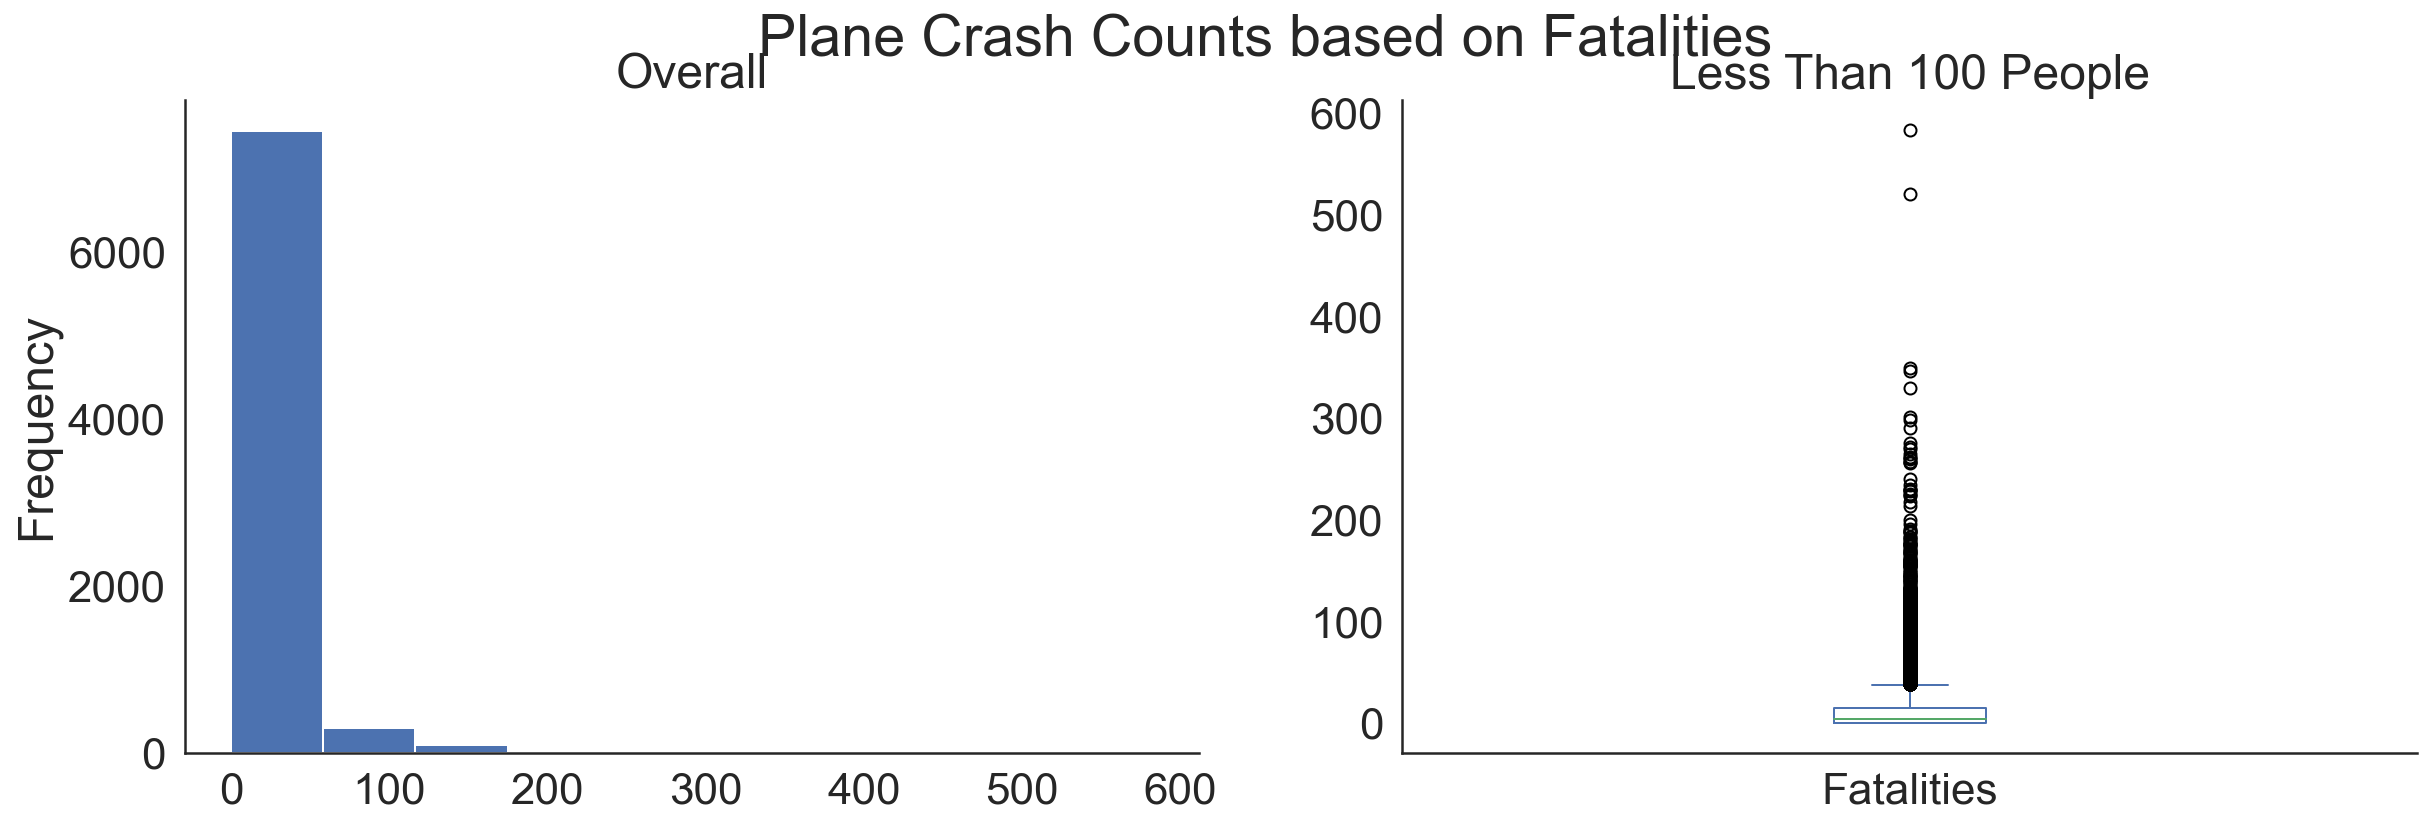

In [14]:
fatal = df['Fatalities']

fig, axes = plt.subplots(1, 2, figsize = (20,6))
fatal.plot(kind = 'hist', ax = axes[0], title = 'Overall')
fatal.plot(kind = 'box', ax = axes[1], title = 'Less Than 100 People')
fig.suptitle('Plane Crash Counts based on Fatalities')
plt.show()

> The overall distribution is extremely right skewed, with the majority plane crashes had less than 10 fatalities.

### 1.7 Collinearity Between `Fatalities` and  `Aboard`
- Lastly, we want to look at the collinearity between the `Fatalities` and the `Aboard`, since they are very likely to be a pair of covariants. 

In [15]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# # creating dummies for gender
# # data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# # the independent variables set
# X = aboard[['Fatalities', 'Aboard']]
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)


# sns.lmplot(data = aboard, x = 'Fatalities', y = 'Aboard');

`VIF` = 3.13 indicates a moderate colinearity between `Fatalities`, `Aboard`. 

## 2 Inferential Analysis

In this section, we are going to explore what are correlational relationships between `time of the day`, `location`, `operator type` and the `fatalities`. 

- *Traditionally, it is reasonable to use the **fatality rate** instead of **fatalities**. However, a lot of accidents do not have aboard number. If we exclude all missing aboard number, we will not have enough sample size to come up with a conclusive results.*
- *More importantly, fatality is highly covariated with aboard number, which suggests the colinearility between two variables, and we believe it is acceptable to use **fatalities** as the single outcome variable*

### 2.1 *Does the fatality associate with a specific time of the day?*

[Text(0.5, 1.0, 'Plane Crash varies over the time of the day ')]

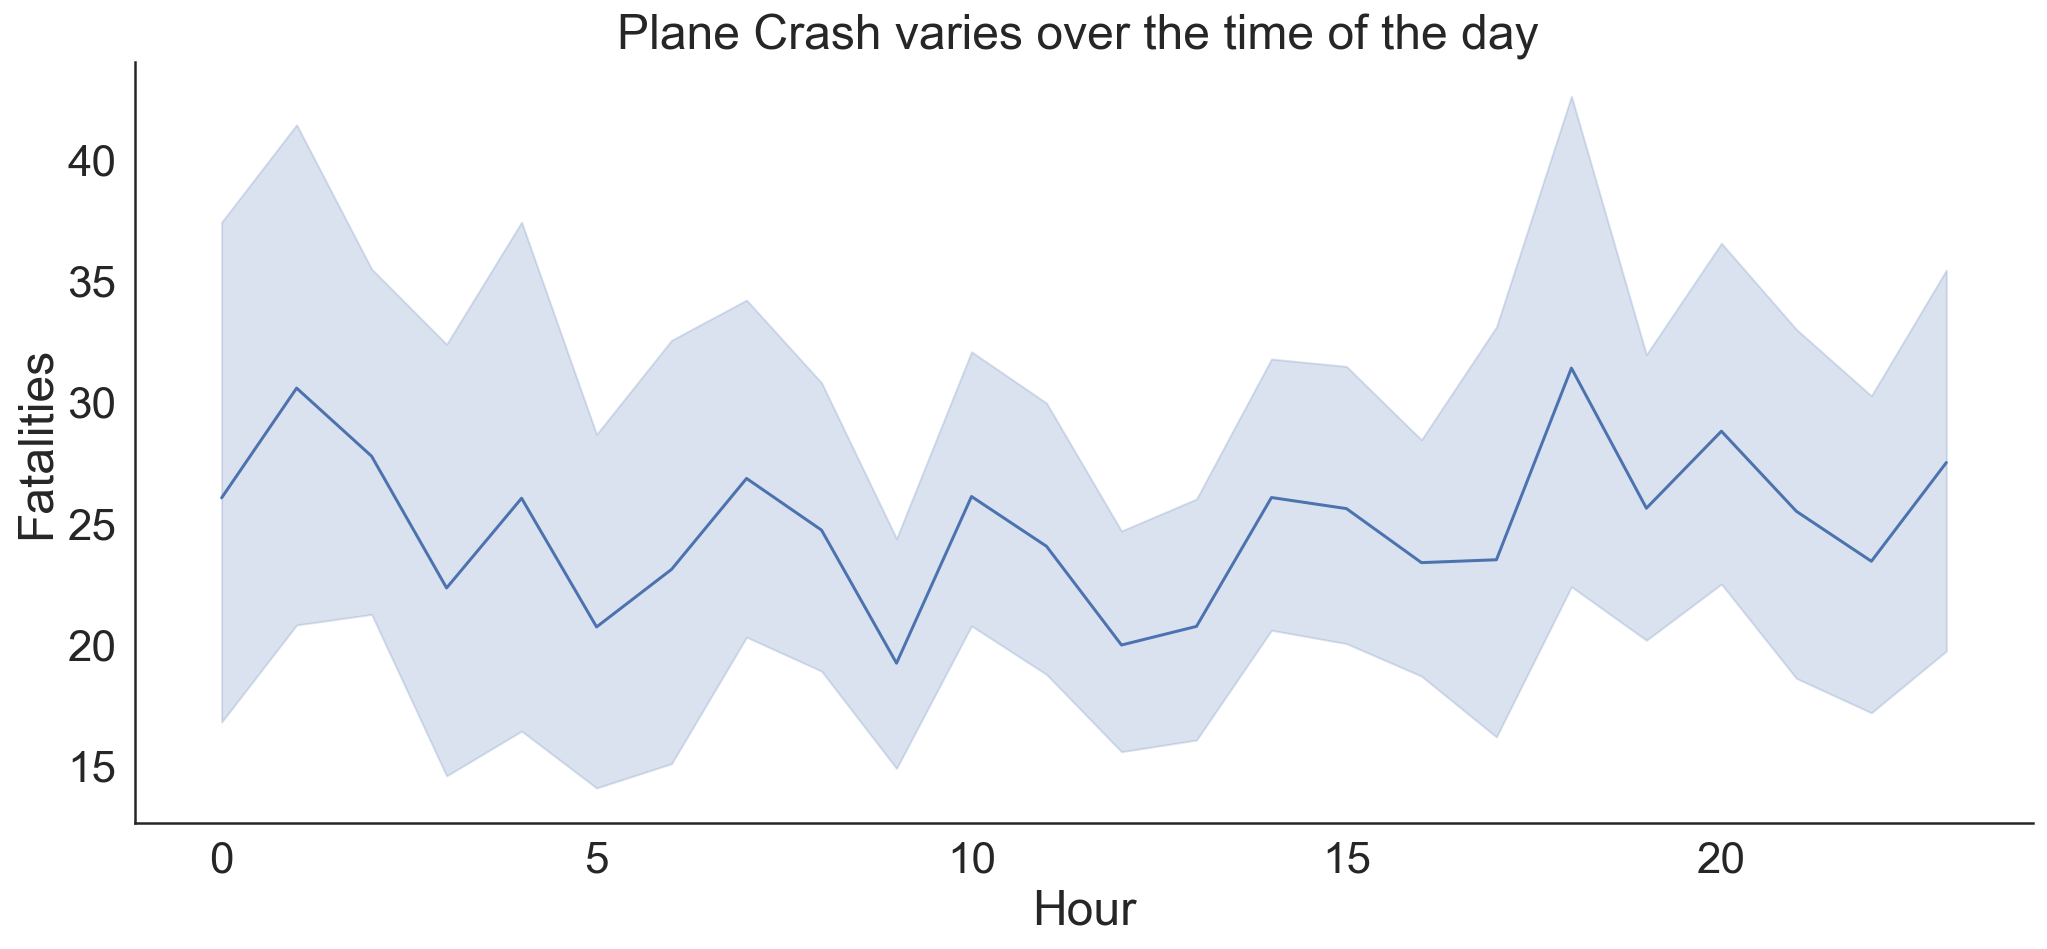

In [16]:
df2 = df2.sort_values(by = 'Hour', ascending = True)

#Generate a graph showing the trend of fatalities over time 
sns.lineplot(x = 'Hour', y = 'Fatalities', data = df2).set(title = 'Plane Crash varies over the time of the day ')


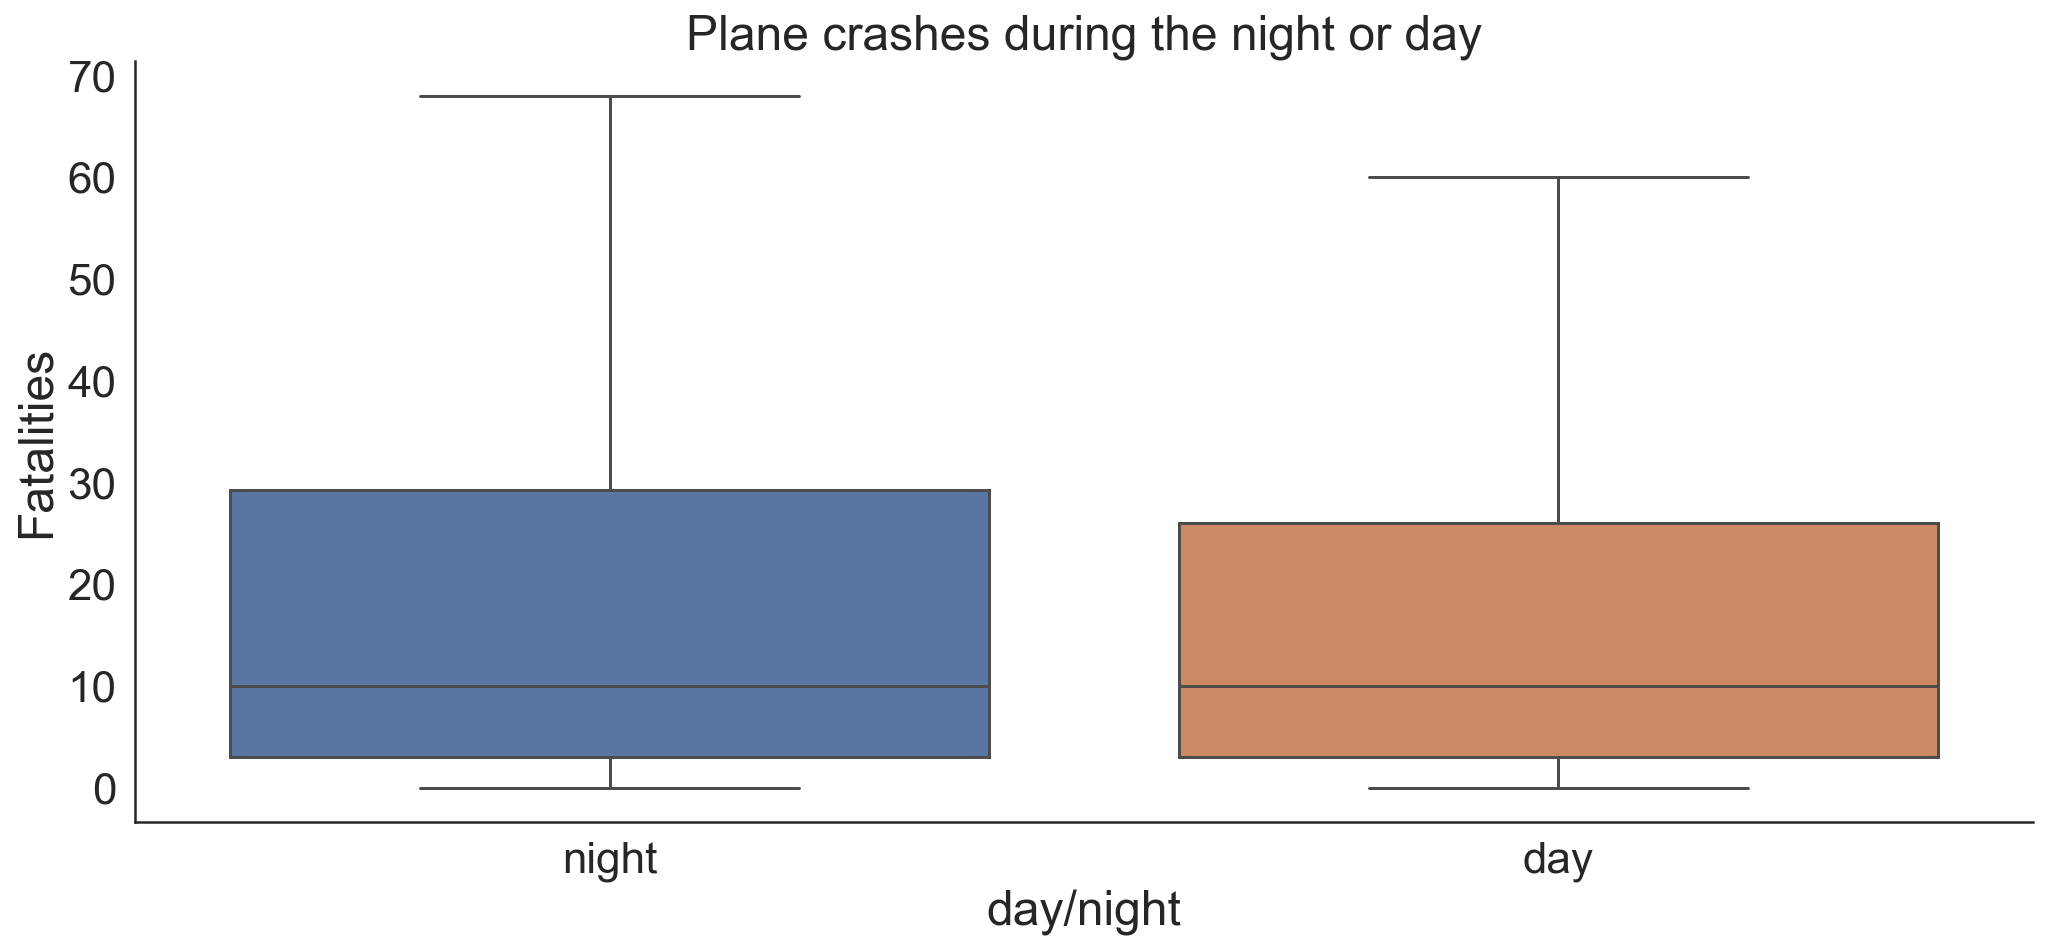

In [17]:
df2.groupby('Hour').mean();

night = [18,19,20,21,22,23,0,1,2,3,4,5,6]
w_night = df2[df2['Hour'].isin(night)]['Fatalities']
w_day = df2[df2['Hour'].isin(night) == False]['Fatalities']

def convert_time(time):
    if time in night:
        return 'night'
    else:
        return 'day'
    
df2['day/night'] = df2['Hour'].apply(convert_time)

sns.boxplot(y='Fatalities', x='day/night', data=df2, showfliers = False).set(title = 'Plane crashes during the night or day');


- it seems like there might be a difference of fatality between the night and day condition, but outliers made it hard to tell by just looking at it.
- so we are going to perform t-test to test whether night lights and daytime flights have a difference. 

In [18]:
t_val, p_val = stats.ttest_ind(w_night, w_day)
t_val, 

if p_val < 0.025:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is NOT a significant difference!


> We see that there is not a significant difference between night and day flights of fatalites, but night flights have a slighter higher fatality than daytime. 

### 2.2 *Do the accidents associate with a specific location in the world?*

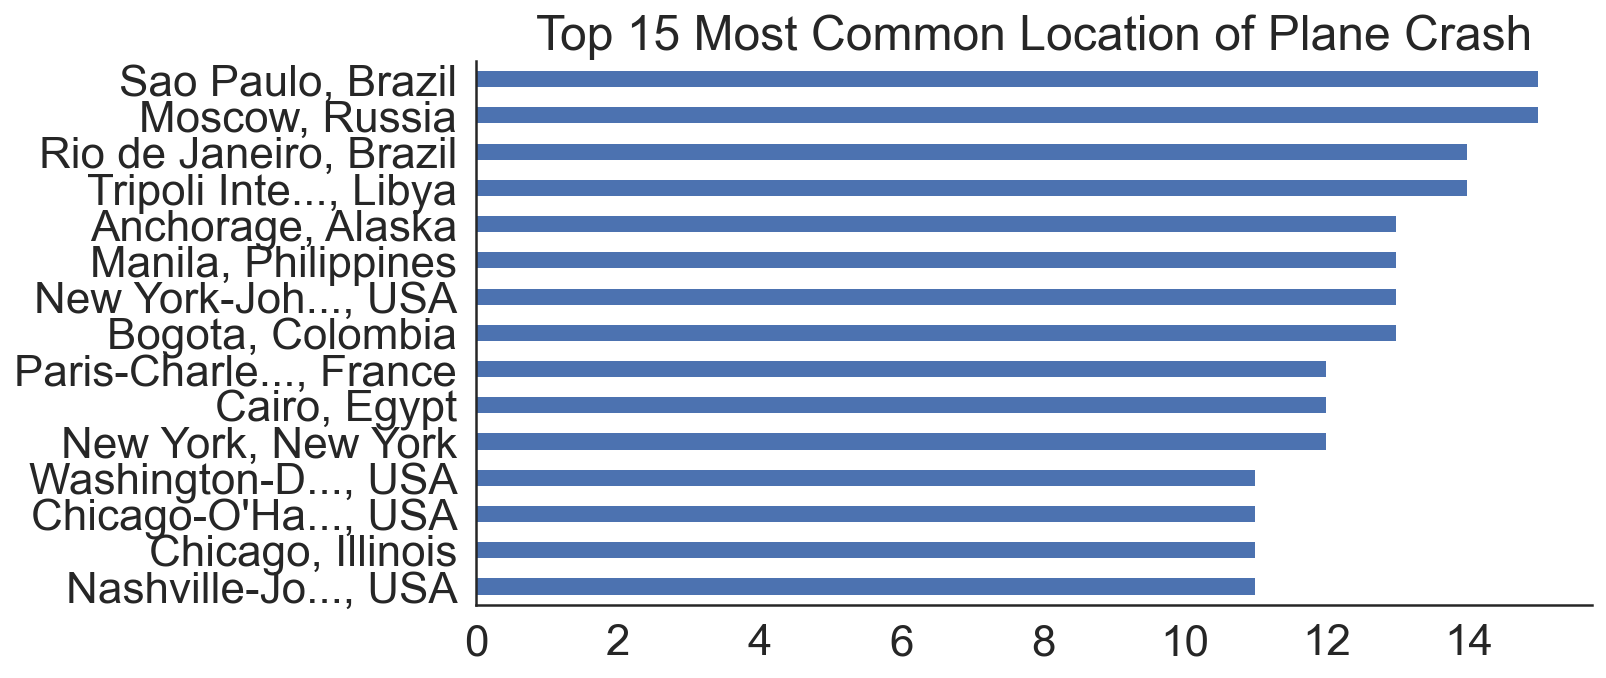

In [19]:
df['Location'].value_counts(ascending = True)[-15:].plot(kind = 'barh', 
                                                         figsize = (10, 5), 
                                                         title = 'Top 15 Most Common Location of Plane Crash')

plt.show()

In [20]:
df2.groupby('Location').mean()

Aboard  Fatalities  Hour
Location                                                          
100 miles SW of Kuujjuaq, Quebec, Canada     2.0         2.0  13.0
110 miles SW of Sochi, Russia               78.0        78.0  13.0
200 miles NE of Derby, Australia             4.0         4.0  10.0
25 nm off Agrigento, Italy                  26.0        26.0   4.0
300 nm NW of San Francisco, California     274.0         0.0  10.0
...                                          ...         ...   ...
Zeya, Russia                                34.0         3.0  20.0
Zifta, Egypt                                 4.0         4.0   7.0
Zurich, Switzerland                         47.0        46.0  14.0
Zwingle, Iowa                                8.0         8.0  15.0
near Orillia, Ontario, Canada                2.0         2.0  11.0

[2577 rows x 3 columns]

We notice that there are many detailed locations. So we currently just focus on country. We perform t-test to test whether certain countries will have different crash rate compared to other countries

In [21]:
countries_with_high_crash_rate = ['Brazil','Russia','USA']
l_high = df2[df2['Location'].str.contains('|'.join(countries_with_high_crash_rate), na=False)]['Fatalities']
l_other = df2[~df2['Location'].str.contains('|'.join(countries_with_high_crash_rate), na=False)]['Fatalities']

t_val, p_val = stats.ttest_ind(l_high, l_other)
t_val, p_val

if p_val < 0.025:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


> Therefore, the statistical analysis suggests the `location` of the accidents has significant `effects` on fatality, in which airplane crash fatality is higher at some parts of the world.
<br>
>  ... and the heat map in the following section should better visualize where around the world is more fatal.

### 2.3 *Does the fatality associated with who's operating the plane (private vs. military personnel)?*


From previous analysis (4.1.4), we learned that:
1. The `Operator` represents the commercial/military background of the pilots.
2. Basically there are 3 sources of the pilots: military, commercial, private.

In this portion, we are going to 
1. group the `Operator` into 3 categories: military, commercial, private (visualize & statistical analysis).
2. Pending: rank the top 15 specific operators from commericial categories (visualize & statistical analysis).


<AxesSubplot:xlabel='Category', ylabel='Fatalities'>

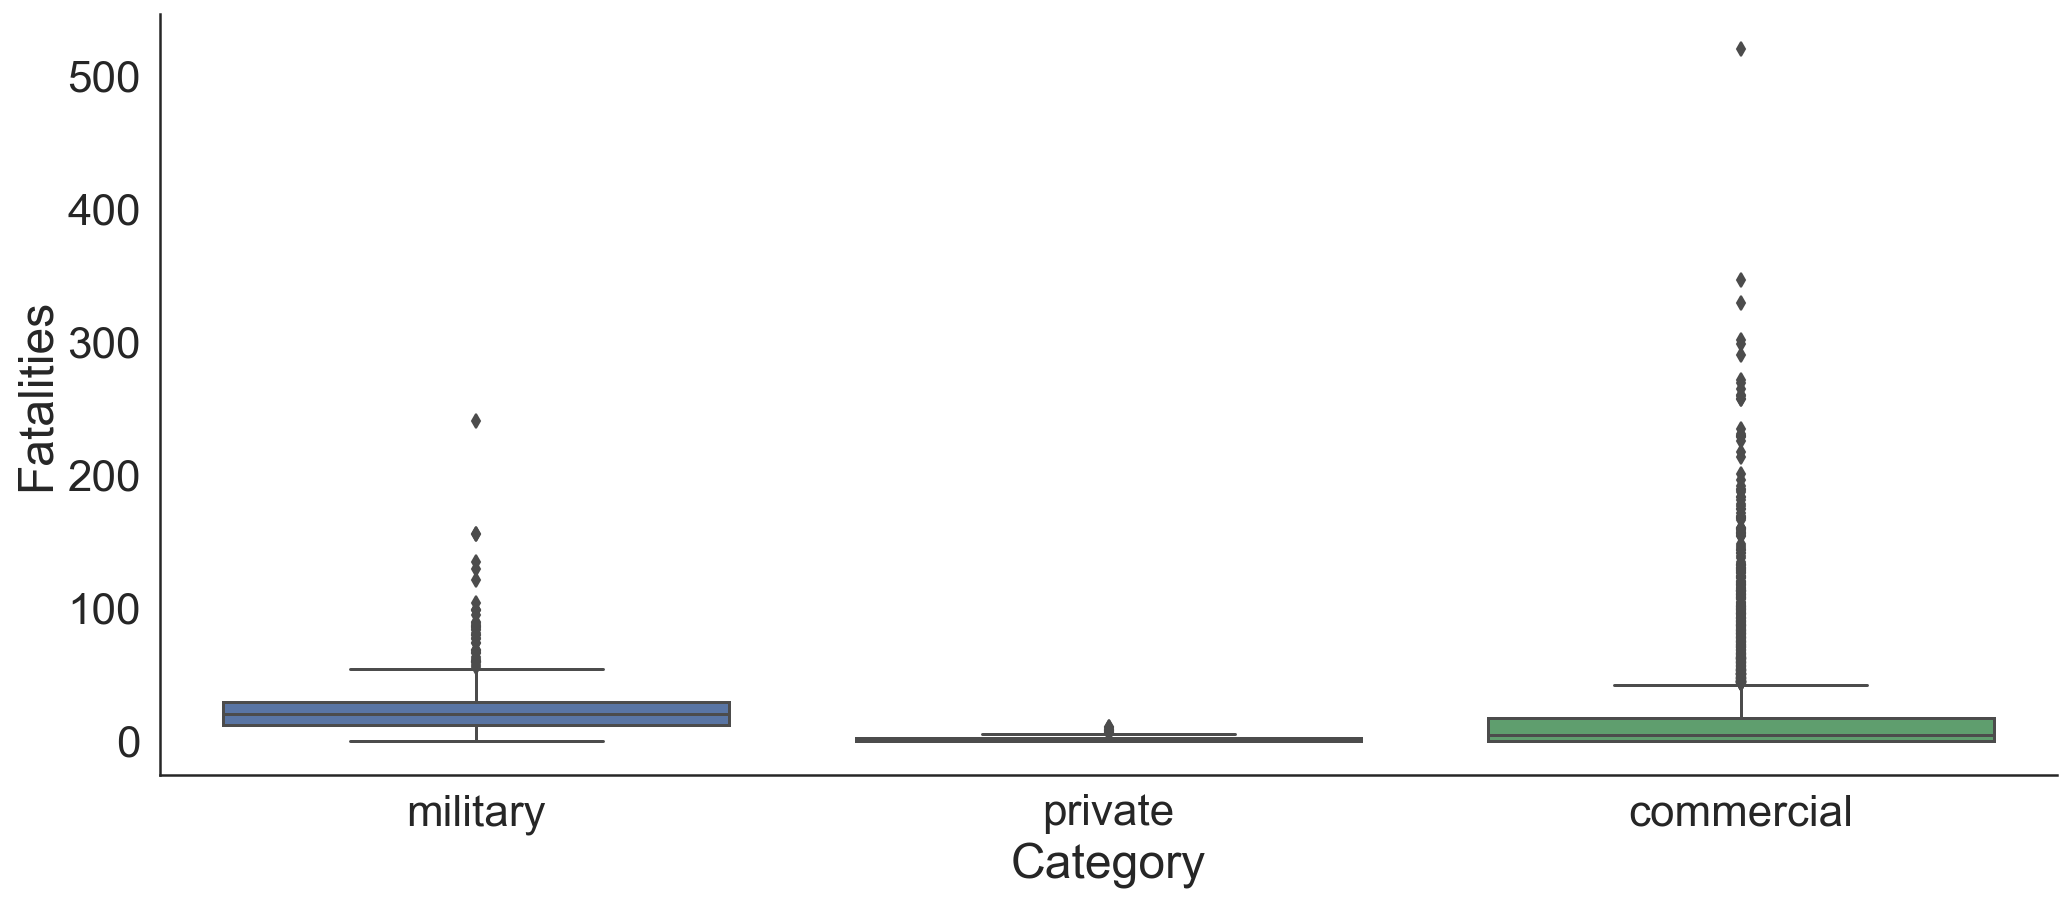

In [22]:
df_operator = df

# make a new dataframe and new column `Category` to classify the operator type 
df_operator['Category'] = df_operator['Operator']

# assgin `military` value
df_operator.loc[df['Operator'].str.contains("Military", na = False), 'Category'] = 'military'

# lowercase the column
df_operator['Category'] = df_operator['Category'].str.lower()

# assign `commercial` value
df_operator['Category'] = np.where(
    (df_operator['Category'] != 'military') & (df_operator['Category'] != "private"), "commercial", df_operator['Category'])

                
df_operator = df_operator.groupby("Operator").filter(lambda x: len(x) > 1)              


# visualization
sns.boxplot(data = df_operator, x = 'Category', y = 'Fatalities')

Although we already excluded observations that appeared only once, the data is still very right skewed - thus we are going to log transform the `Fatalities`.

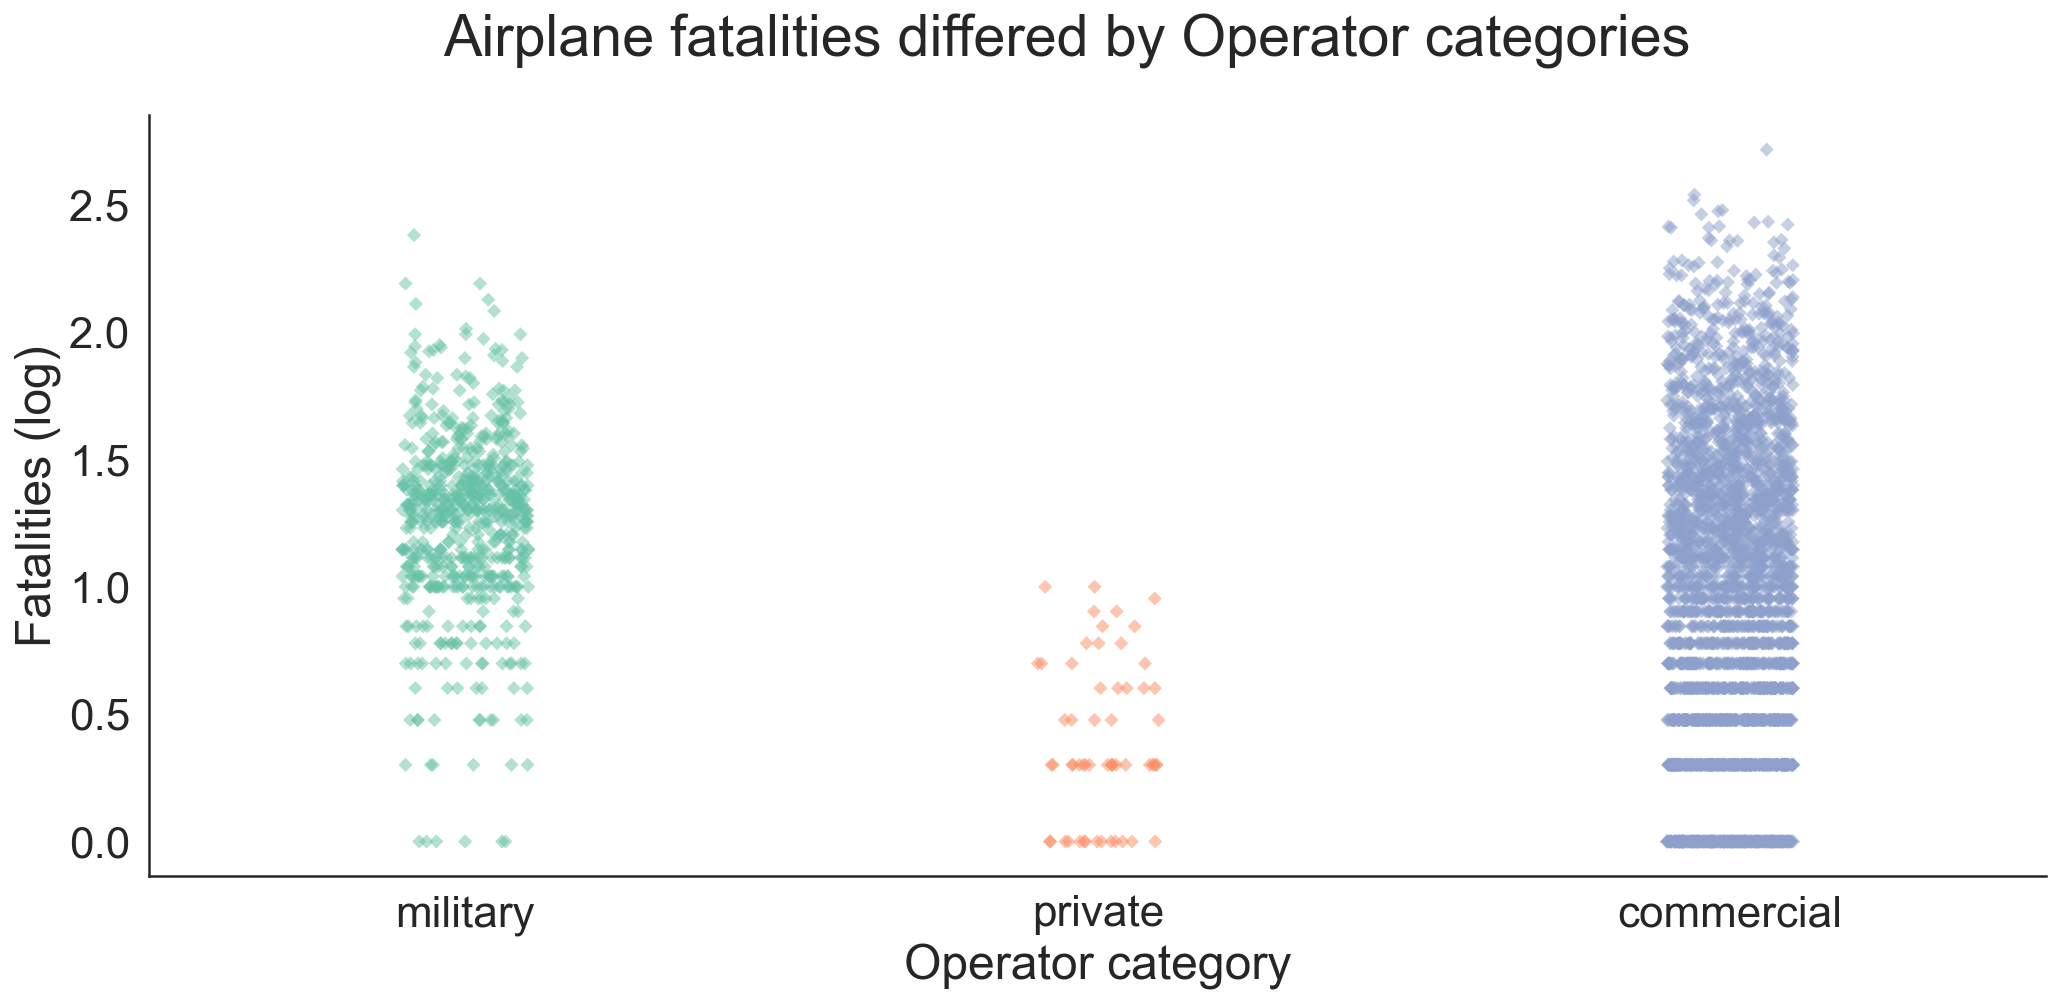

In [23]:
# log transformed fatalities
sns.stripplot(data = df_operator, x = 'Category',
              y = np.log10(df_operator['Fatalities'][df['Fatalities'].notnull()]),
              palette="Set2", size = 5, marker="D", edgecolor="gray", alpha=.5);


plt.suptitle('Airplane fatalities differed by Operator categories')
plt.xlabel('Operator category')
plt.ylabel('Fatalities (log)');

There is some apparant difference between Operator categories, then we are going to perform t-test to statistically access the significance.

In [24]:
model = smf.ols(formula = 'Fatalities ~ Category', data = df_operator)
operator_model = model.fit()

print(operator_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Fatalities   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     39.32
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.15e-17
Time:                        19:53:56   Log-Likelihood:                -23274.
No. Observations:                4778   AIC:                         4.655e+04
Df Residuals:                    4775   BIC:                         4.657e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               16.5937 

> By fit the model, we can see there are significant differences among groups, in which:
   > - `military` operatored flights have highest fatalities, followed by `commercial` operators, with `private` operators have lowest fatalities.

## 3 Text Analysis 

In this section, we want to obtain keywords in `Summary` that may give us insights on the cause of the plane crashes. Specifically we would like to investige the keywords separately for those with more fatalities and those with less fatalities.

In [25]:
# import packages needed for text anaylsis
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /Users/ari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Tokenize the words in the summary
df['tfidf'] = df['Summary'].str.lower().str.replace('[^a-z ]+', '', regex = True)
df.dropna(subset = ['tfidf'], inplace = True)

# Separate dataset by number of fatalites where top 25 percentile is considered high,
# and the rest considers as low fatalities
cutoff = np.percentile(df['Fatalities'], 75)
low_fatal = df[df['Fatalities'] <= cutoff]
high_fatal = df[df['Fatalities'] > cutoff]



# create the corpus with 2 docs: 
# all summary from the low fatality and all summary from the high fatality 
corpus = [low_fatal['tfidf'].sum(), high_fatal['tfidf'].sum()]

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf = True,
                        analyzer = 'word',
                        max_features = 2000,
                        tokenizer = word_tokenize,
                        stop_words = set(stopwords.words('english')))

In [27]:
# Fit and Transfrom vectorizer and transform into a DataFrame
fatal_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
fatal_tfidf.columns = tfidf.get_feature_names()
fatal_tfidf.index = ['low_death', 'high_death']
fatal_tfidf = fatal_tfidf.T
fatal_tfidf.head()

low_death  high_death
abandoned   0.015418    0.019138
ability     0.016860    0.007334
able        0.028649    0.029306
abnormal    0.010940    0.017502
aboard      0.034357    0.038801

In [28]:
# Get top20 words with the highest tfidf within each document
low_keywords = fatal_tfidf['low_death'].sort_values(ascending = False)[:20].index
high_keywords = fatal_tfidf['high_death'].sort_values(ascending = False)[:20].index

In [29]:
# Get words that only appear in low_keywords
low_specific = []
for w in low_keywords:
    if w not in high_keywords:
        low_specific.append(w)

# Get words that only appear in high_keywords
high_specific = []
for w in high_keywords:
    if w not in low_keywords:
        high_specific.append(w)

In [30]:
print('low fatality specific words:', low_specific) 
print('high fatality specific words:', high_specific)

low fatality specific words: ['cargo', 'control', 'takeoff', 'attempting']
high fatality specific words: ['miles', 'land', 'fire', 'ft']


> Since tfidf analyzes the appereance of unique words in the summary of our reasons instead of multiple words explaining the result, our text analysis is limited. Our result shows low fatality may link to cargo load of plane and high fatality relates to fire in maybe plane itself or environment.


## 4 Mechine Learning 

We've decided to use `Aboard`,`Category`, `Hour` as our three variables for predicting the fatality of a plane crash. 

In [31]:
#import relavent functions from sklearn for ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import FunctionTransformer

In [32]:
# Apply different transformation to the columns that are used for prediction
col_trans = ColumnTransformer(
    transformers = [
            ('ohe', OneHotEncoder(drop = 'first'), ['Category', 'Hour']),
            ('log', 'passthrough', ['Aboard']) 
    ])

# Create Pipeline object to preform multiple steps at once
pl = Pipeline([
        ('preprocessor', col_trans),
        ('mdl', DecisionTreeClassifier())
    ])

# obtain the X and Y for our machine learning
df_ml = df[(df['Hour'].notna()) & (df['Aboard'] > 0)]
X = df_ml[['Hour', 'Category', 'Aboard']]
Y = df_ml['Fatalities']

# Split dataset into 75:25 for training:testing
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [33]:
# finding the best parameter to use for our classifier
grids = GridSearchCV(pl, param_grid={'mdl__max_depth' : np.arange(2, 500, 20),
                                     'mdl__class_weight' : ['balanced'] }, return_train_score=True)
grids.fit(x_train, y_train)
grids.best_params_

{'mdl__class_weight': 'balanced', 'mdl__max_depth': 22}

In [34]:
# implement the best parameters in to the model
pl = Pipeline([
        ('preprocessor', col_trans),
        ('mdl', DecisionTreeClassifier(max_depth = 22, class_weight = 'balanced'))
    ])

# fit and check the accuarcy of the model
pl.fit(x_train, y_train)
print('model accuracy of training set: ', "%.5f" % pl.score(x_train, y_train))
print('model accuracy of testing set: ', "%.5f" % pl.score(x_test, y_test))

model accuracy of training set:  0.77257
model accuracy of testing set:  0.57072


> - The accuaracy of the training set is pretty high (>0.8) yet the accuracy of the training set is only around 0.5.
> - This suggests that our model is having a bit of overfitting in training set.

## 5 Geospatial Statistics

In [35]:
# from geopy.geocoders import Photon
# locator = Photon(user_agent="myGeocoder")
# latitudes = []
# longitudes = []
# for i in df['Location'].tolist():
#     try:
#         location = locator.geocode(i)
#         latitudes.append(location.latitude)
#         longitudes.append(location.longitude)
#     except:
#         latitudes.append(np.nan)
#         longitudes.append(np.nan)
# df['Latitude'] = latitudes
# df['Longitude'] = longitudes
df = pd.read_csv('data/new_df.csv')

In [36]:
map = folium.Map(location = [36.7783,119.4179], tiles='Stamen Terrain' , zoom_start = 2)

heat_data = [[i, j] for i,j in zip(df['Latitude'].tolist(), df['Longitude'].tolist()) if not np.isnan(i) and not np.isnan(j)]


marker_cluster = plugins.MarkerCluster().add_to(map)
for point in range(0, len(heat_data)):
    folium.Marker(heat_data[point], icon=folium.Icon(color='darkblue', icon_color='white', icon='plane', angle=0, prefix='fa')).add_to(marker_cluster)

# plugins.HeatMap(heat_data).add_to(map)

map

> - According the the heatmap, visually we found that two areas that have most airplane crashes are Western Europe and Eastern USA. The trend is consistent with the history of the aircraft development, in which these two regions are probably most developed, leading the aircraft industry, and have the most population. 
> - Regions such as Middle America and Sounth America also have more accidents despite these are less developed areas. Therefore, the geological features or also factors are potentially contribute to the high air crash rates, yet we have not investigated and we hope we could do it in the future.

### *We don't think the github preview could successfully load the interactive heat map. We have included the html file under the data folder*

# Conclusion & Discussion

### Conclusion:
- We have conducted several analysis to explore what are some factors that associate with the airplane crash fatalities, or what makes a plane crash more fatal. 
> 1. First, the most significant findings is the effects of the `crash location`, and `type of operator`. The heat map reveals that some parts of the world are at higher risk of plane crashing, notable those have higher population density and have early history of develping aircrafts (Western Europe and Eastern US). But other places such as South America also have some most fatal airplane accident (e.g. Sao Paulo, Brazil). 
> 2. However, it seems that the crash happens despite the time of the day, in which the difference of fatality between the night and the day is not significant. HOWEVER, the result did not normalize the data and we do not know the distribution of the all flights over the day. Since we focus on the fatality instead of accident rate, we can still draw conclusion that night condition does not associate with higher fatality (despite the accident rate might be higher).
> 3. Text analysis reveals that low fatality may link to "cargo" load of plane and high fatality relates to "fire" in maybe plane itself or environment.




### Limitation:
- Our dataset does not include most up-to-data air crash information.
- Early air crash data have bad accuracy and some are lack of essential information we need.
- In terms of statistical analysis, some variable (`time of the day`, `fatalities`) are not normally distributed, which violated some pre-assumptions of the statistical tests.  
- Machine learning: accuracy for testing set not very high, also facing overfitting issues. 

# Ethics & Privacy


1. *Research Question*:<br>we are motivated to investigate this question because the recent fatal accident happend in our hometown, which raised the awareness and interests at airplane crashes. We believe we asked a fair question from an unbiased standings.  
2. *Implication*: <br>it is not likely that the results of our project will be co-opted for negarious purposes, but we are cautious about the potential unintended inference my by drawn from our results, which might contribute to stigmatize of certain factors, such as certain airlines and operators. Therefore, we are cautious that our study will only draw **correlational NOT causal conclusions**.   
3. *Data*: <br>we are cautious that our data is not an official release from aircraft accident investigation organizations, nor a third-party independent source. But we have selectively validate some observations with other sources to confirm the credibility and accuracy of the dataframe. 
4. *Informed Consent*: <br> public access.  
5. *Privacy*: <br>we are using de-identified dataset which does not contain information for individual citizen. Instead, it takes average statistics from census data. Therefore, our data is at low risk of having privacy issues. 
6. *Evaluation*: <br> major variables in our study are objective measures of existing facts. We think they follow the Goodhart's Law and do not add additional biases.  
7. *Analysis*: <br> to ensure an unbiased analysis, we will include all observations and accept whatever results we get from the analysis. We will not intentionally modify and select specific data in order to get a significant result. Moreover, we are cautious of issues such as confonuds and colinearity. Although we can never make causaul inference from this dataset, we can run additional statistical tests to ensure the validity of the correlations. 
8. *Transparency & Appeal*: all data, analysis, codes for models will be visible to public, and we accept critiques from all sources. 
9. *Continuous Monitoring*: we are against using our results to make any causaul inferences between between aricraft fatality rate and personal attributes.


> Overall, we are actively aware the potential risks of our analysis which might compromise individual privacy or confidentiality, as well as genrate data for purposes taht harm certain group of people. However, after thoroughly discussion and evaluation, we believe the current project is at minimal risk of violating the ethnic and privacy codes of data science. And we believe the result of our study is able to bring insights of world aircraft crashes.




# Team Contributions

- Zihan Chen: Making the outline, presentation slides, organizing group meetings, proofreading and contributing to the writing. 
- Ning Ma: work on background resources, ethics discussion,  and inferential analysis about time's relaiton with fatality. Also part of tfidf analysis.
- Kancheng Yin: worked on part 1.1-1.6 in the descriptive analysis and also did text analysis and machine learning.
- Nan Jiang: conduct data collecting and cleaning, analyze variable relation, draw heatmap